In [1]:
import librosa
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
n_mfcc = 40
n_fft = 1024  # setting the FFT size to 1024
hop_length = 10*16 # 25ms*16khz samples has been taken
win_length = 25*16 #25ms*16khz samples has been taken for window length
window = 'hann' #hann window used
n_chroma=12
n_mels=128
n_bands=7 #we are extracting the 7 features out of the spectral contrast
fmin=100
bins_per_ocatve=12

In [3]:
# define function to extract features
def extract_features(file_path):
    try:
        # Load audio file and extract features
        y, sr = librosa.load(file_path, sr=16000)
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40,n_fft=n_fft,hop_length=hop_length,win_length=win_length,window=window).T,axis=0)
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr,n_fft=n_fft, hop_length=hop_length, win_length=win_length, window='hann',n_mels=n_mels).T,axis=0)
        stft = np.abs(librosa.stft(y))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, y=y, sr=sr).T,axis=0)
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, y=y, sr=sr,n_fft=n_fft,
                                                      hop_length=hop_length, win_length=win_length,
                                                      n_bands=n_bands, fmin=fmin).T,axis=0)
        tonnetz =np.mean(librosa.feature.tonnetz(y=y, sr=sr).T,axis=0)
        features = np.concatenate((mfcc, chroma, mel, contrast, tonnetz))
        # print(shape(features))
        return features
    except:
        print("Error: Exception occurred in feature extraction")
        return None

# define path to data directory
path = 'D:\Machine Learning\ML Models\Baby Cry Classification ML Model\dataset' #Provide your path here
# initialize empty lists to hold extracted features and labels
features = []
labels = []

# loop through the directories
for label in os.listdir(path):
    # loop through the files in each directory
    print(f"{label} data is loading.....")
    for file_name in os.listdir(os.path.join(path, label)):
        file_path = os.path.join(path, label, file_name)
        # extract features and append to list
        feature = extract_features(file_path)
        if feature is not None:
            features.append(feature)
            labels.append(label)
    print(f"{label} data loaded....")

belly_pain data is loading.....
belly_pain data loaded....
burping data is loading.....
burping data loaded....
discomfort data is loading.....
discomfort data loaded....
hungry data is loading.....
hungry data loaded....
tired data is loading.....
tired data loaded....


In [4]:
# convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)
# encode labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

### KNN Model

In [5]:
# train KNN model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)

KNN Accuracy: 0.905811623246493


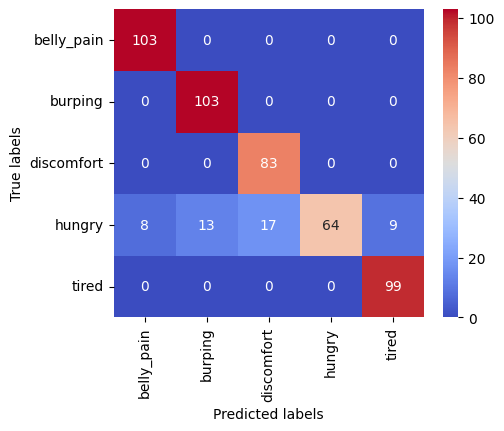

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)

# Compute the confusion matrix
cm = confusion_matrix(y_test, knn_pred)

# Define the label names
label_names = ['belly_pain','burping','discomfort','hungry','tired'] # Add your label names here

# Plot the confusion matrix with a colormap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Assuming the KNN model and predictions are already defined as per your code

# Calculate accuracy
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)

# Calculate precision
knn_precision = precision_score(y_test, knn_pred, average='macro')
print("KNN Precision:", knn_precision)

# Calculate recall
knn_recall = recall_score(y_test, knn_pred, average='macro')
print("KNN Recall:", knn_recall)

# Calculate F1 score
knn_f1 = f1_score(y_test, knn_pred, average='macro')
print("KNN F1 Score:", knn_f1)

# Generate classification report
classification_report = classification_report(y_test, knn_pred)
print("Classification Report:\n", classification_report)

KNN Accuracy: 0.905811623246493
KNN Precision: 0.9125051258154707
KNN Recall: 0.9153153153153152
KNN F1 Score: 0.8996620455063834
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       103
           1       0.89      1.00      0.94       103
           2       0.83      1.00      0.91        83
           3       1.00      0.58      0.73       111
           4       0.92      1.00      0.96        99

    accuracy                           0.91       499
   macro avg       0.91      0.92      0.90       499
weighted avg       0.92      0.91      0.90       499



### Random Forest Model

In [8]:
# train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9959919839679359


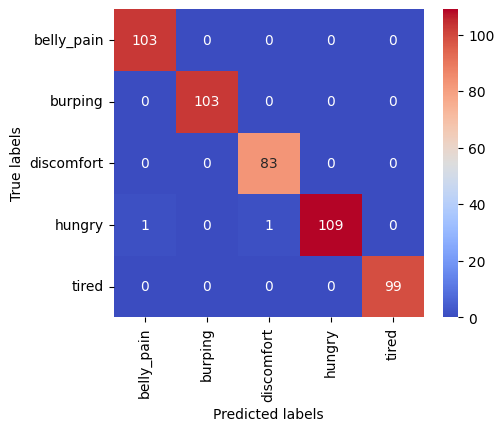

In [9]:
cm = confusion_matrix(y_test, rf_pred)
# Plot the confusion matrix with a colormap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

# Calculate precision
rf_precision = precision_score(y_test, rf_pred, average='macro')
print("Random Forest Precision:", rf_precision)

# Calculate recall
rf_recall = recall_score(y_test, rf_pred, average='macro')
print("Random Forest Recall:", rf_recall)

# Calculate F1 score
rf_f1 = f1_score(y_test, rf_pred, average='macro')
print("Random Forest F1 Score:", rf_f1)

# Generate classification report
classification_report = classification_report(y_test, knn_pred)
print("Classification Report:\n", classification_report)

Random Forest Accuracy: 0.9959919839679359
Random Forest Precision: 0.9956959706959708
Random Forest Recall: 0.9963963963963964
Random Forest F1 Score: 0.9960180298165199
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       103
           1       0.89      1.00      0.94       103
           2       0.83      1.00      0.91        83
           3       1.00      0.58      0.73       111
           4       0.92      1.00      0.96        99

    accuracy                           0.91       499
   macro avg       0.91      0.92      0.90       499
weighted avg       0.92      0.91      0.90       499



### SVM Model

In [11]:
# train SVM model
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.9218436873747495


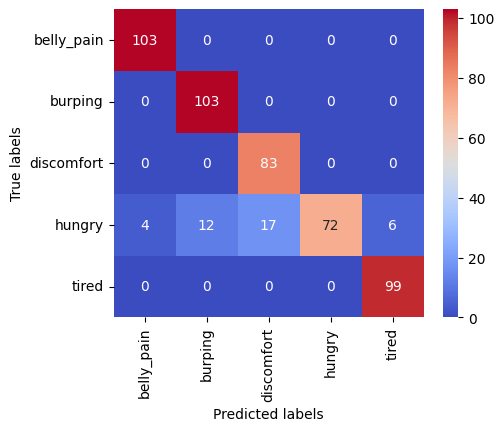

In [12]:
cm = confusion_matrix(y_test, svm_pred)

# Define the label names
label_names = ['belly_pain','burping','discomfort','hungry','tired'] # Add your label names here

# Plot the confusion matrix with a colormap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate accuracy
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)

# Calculate precision
svm_precision = precision_score(y_test, svm_pred, average='macro')
print("SVM Precision:", svm_precision)

# Calculate recall
svm_recall = recall_score(y_test, svm_pred, average='macro')
print("SVM Recall:", svm_recall)

# Calculate F1 score
svm_f1 = f1_score(y_test, svm_pred, average='macro')
print("SVM F1 Score:", svm_f1)

# Generate classification report
classification_report_result = classification_report(y_test, svm_pred)
print("Classification Report:\n", classification_report_result)

SVM Accuracy: 0.9218436873747495
SVM Precision: 0.9262252278400187
SVM Recall: 0.9297297297297298
SVM F1 Score: 0.9180967631450233
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       103
           1       0.90      1.00      0.94       103
           2       0.83      1.00      0.91        83
           3       1.00      0.65      0.79       111
           4       0.94      1.00      0.97        99

    accuracy                           0.92       499
   macro avg       0.93      0.93      0.92       499
weighted avg       0.93      0.92      0.92       499



### Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier()

# Train the model using the training sets
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
dts_pred = clf.predict(X_test)

# Print model accuracy
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
      .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.95


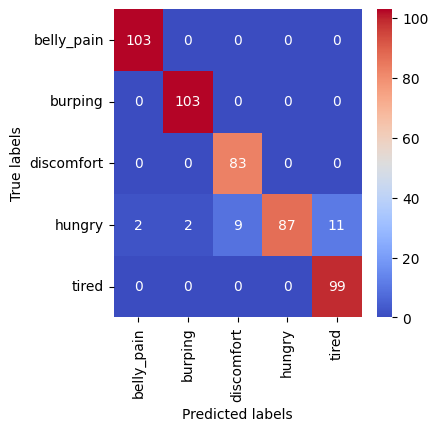

In [15]:
cm = confusion_matrix(y_test, dts_pred)

# Plot the confusion matrix with a colormap
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [28]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(y_test, dts_pred)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, dts_pred, average='macro')
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, dts_pred, average='macro')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_test, dts_pred, average='macro')
print('F1 Score:', f1)

# Generate classification report
classification_report_result = classification_report(y_test, dts_pred)
print('Classification Report:\n', classification_report_result)

Accuracy: 0.9519038076152304
Precision: 0.9522001167956583
Recall: 0.9567567567567569
F1 Score: 0.9506704424268895
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       103
           1       0.97      1.00      0.99       103
           2       0.87      1.00      0.93        83
           3       1.00      0.78      0.88       111
           4       0.93      1.00      0.96        99

    accuracy                           0.95       499
   macro avg       0.95      0.96      0.95       499
weighted avg       0.96      0.95      0.95       499



### XG Boost Model

In [29]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define XGBoost classifier with default hyperparameters
xgb_clf = xgb.XGBClassifier()

# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# Predict labels on test data
xgb_pred = xgb_clf.predict(X_test)

# Compute accuracy score
acc = accuracy_score(y_test, xgb_pred)
print("XGBoost accuracy:", acc)


XGBoost accuracy: 0.9979959919839679


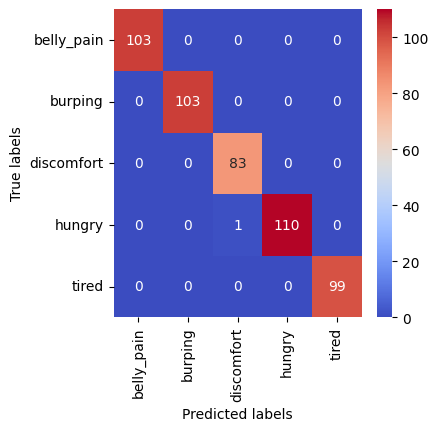

In [30]:
cm = confusion_matrix(y_test, xgb_pred)
# Plot the confusion matrix with a colormap
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, xgb_pred)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, xgb_pred, average='macro')
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, xgb_pred, average='macro')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_test, xgb_pred, average='macro')
print('F1 Score:', f1)

# Generate classification report
classification_report_result = classification_report(y_test, xgb_pred)
print('Classification Report:\n', classification_report_result)


Accuracy: 0.9979959919839679
Precision: 0.9976190476190476
Recall: 0.9981981981981981
F1 Score: 0.9978974178340152
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       103
           2       0.99      1.00      0.99        83
           3       1.00      0.99      1.00       111
           4       1.00      1.00      1.00        99

    accuracy                           1.00       499
   macro avg       1.00      1.00      1.00       499
weighted avg       1.00      1.00      1.00       499

